Your objective is to delve into the World Happiness Report dataset, which includes columns like Country, Year, Happiness_Score, GDP_per_Capita, Social_Support, Healthy_Life_Expectancy, Freedom_to_Make_Life_Choices, Generosity, and Perceptions_of_Corruption.

Load and Inspect Data:

Utilize pandas to load the World Happiness Report Dataset.
Examine the data to grasp its structure and contents of the year 2019.

In [44]:
import pandas as pd

df = pd.read_csv('2019.csv')
print(df.head())
print(df.describe())
print(df.info())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

Data Preprocessing:

Address missing values and adjust data types as necessary.

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


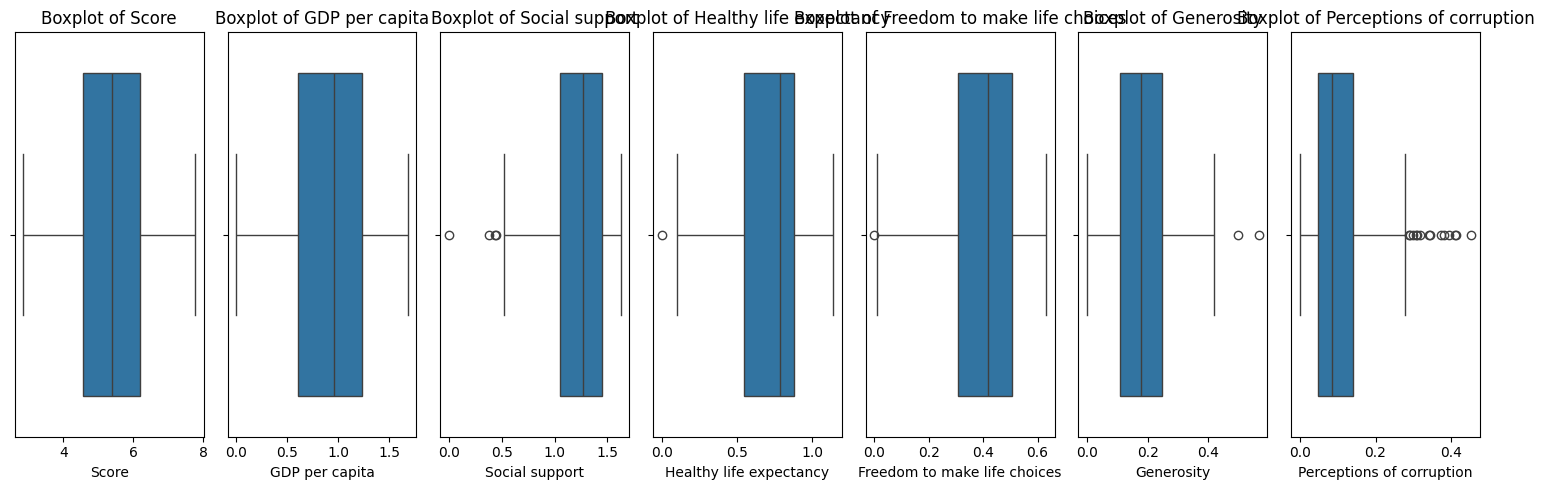

In [45]:
print(df.isnull().sum())
#There ara no missing values

#Use statistical methods to detect outliers in columns like Fare and Age.
def get_outliers(column):
    #Calculate Q1 et Q3 for the column
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    #Caluculate IQR
    IQR = Q3 - Q1
    #Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return boolean Series where True means an outlier
    return (column < lower_bound) | (column > upper_bound)

#Decide on a strategy to handle the identified outliers, such as capping, transformation, or removal.
#Step 1: Identify and count outliers per column
def count_outliers(df, col_name):
    mask = get_outliers(df[col_name])
    count = mask.sum()
    percent = 100 * count / len(df)
    return count, round(percent, 2)

#Step 2: Visualize
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Select columns with float data-type
df_float = df.select_dtypes(include=['float']).columns

# Set up the figure with 1 row, 7 columns (adjust if you want fewer or more)
fig, axes = plt.subplots(nrows=1, ncols=len(df_float), figsize=(15, 5))

# Create boxplots for each float column
for index, column in enumerate(df_float):
    sns.boxplot(x=df[column], ax=axes[index])
    axes[index].set_title(f"Boxplot of {column}")

# Display
plt.tight_layout()
plt.show()

#Drop outliers for 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity'
#Too many outliers in Perception of corruption
columns_to_drop_outliers = ['Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity']
# Loop through each numerical column and remove outliers
for col in columns_to_drop_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only rows where values are within the bounds for this column
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#Encodage des variables catégorielles: Country or region
#from sklearn.preprocessing import LabelEncoder
#df['Country or region'] = LabelEncoder().fit_transform(df['Country or region'])

#Normalization of float colomns
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df[df_float] = scaler.fit_transform(df[df_float])

#print(df.head())


Social Support and Happiness:

Employ a Matplotlib scatter plot to investigate the relationship between ‘Social support’ and ‘Score’.

<Figure size 800x600 with 0 Axes>

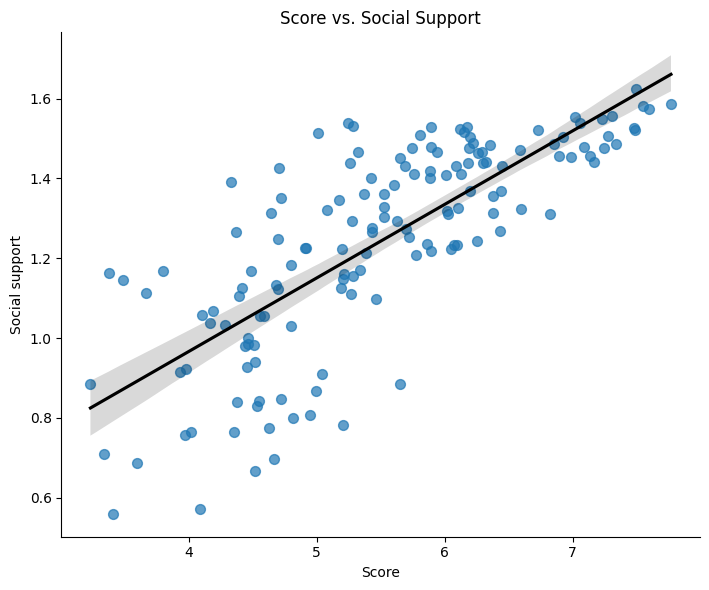

In [47]:
plt.figure(figsize=(8, 6))

sns.lmplot(
    x='Score',
    y='Social support',
    data=df,
    palette='coolwarm',
    height=6,
    aspect=1.2,
    scatter_kws={'s': 50, 'alpha': 0.7},  # Custom scatterplot point size and transparency
    line_kws={'color': 'black'}          # Regression line style
)

plt.title('Score vs. Social Support')
plt.tight_layout()
plt.show()

Regional Comparisons of GDP and Health:

Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.
Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.

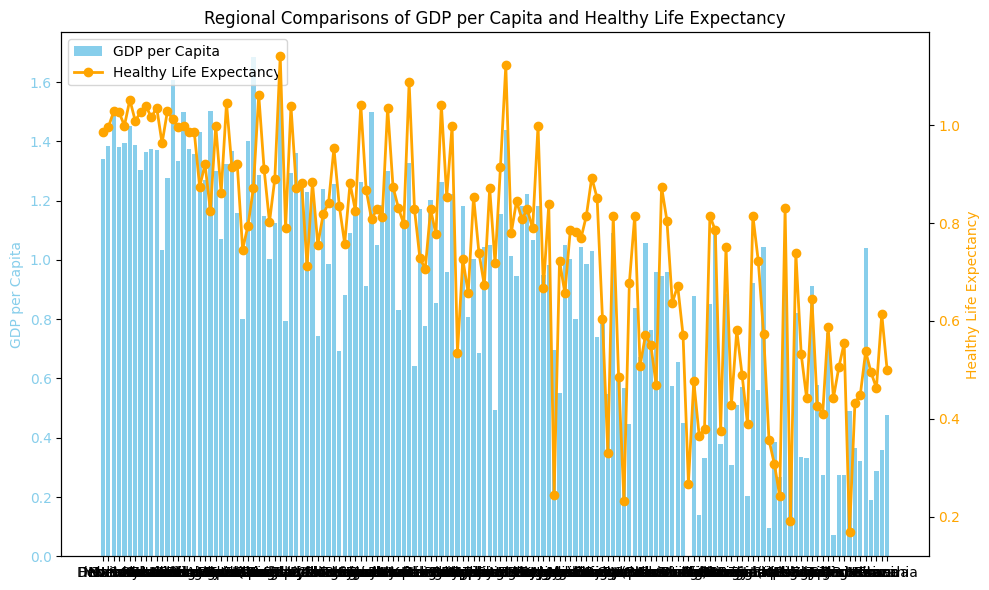

In [43]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for GDP per Capita on primary y-axis
bars = ax1.bar(df['Country or region'], df['GDP per capita'], color='skyblue', label='GDP per Capita')
ax1.set_ylabel('GDP per Capita', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a secondary y-axis for Healthy Life Expectancy
ax2 = ax1.twinx()
ax2.plot(df['Country or region'], df['Healthy life expectancy'], color='orange', marker='o', linewidth=2, label='Healthy Life Expectancy')
ax2.set_ylabel('Healthy Life Expectancy', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Regional Comparisons of GDP per Capita and Healthy Life Expectancy')

# Combine legends from both axes
bars_legend = ax1.get_legend_handles_labels()
line_legend = ax2.get_legend_handles_labels()
ax1.legend(bars_legend[0] + line_legend[0], bars_legend[1] + line_legend[1], loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
